In [2]:
!pip install seaborn

In [3]:
!pip install phik

In [4]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv('ds_salaries.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.head(11)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [8]:
df.isna().sum() #Проверяем пустые значения, получаем что пропусков нет.

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.describe().T #строка salary неинформативная из-за разности курсов валют в разных странах

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [11]:
duplicateRows = df[df.duplicated ()]
duplicateRows #Проверяем дубли строк

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [12]:
df = df.drop_duplicates() #Удаляем дубли
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,2584.0,2022.301084,0.749179,2020.0,2022.0,2022.0,2023.0,2023.0
salary,2584.0,210365.296440,808037.535609,6000.0,90000.0,134630.0,182562.5,30400000.0
salary_in_usd,2584.0,133409.280186,67136.837329,5132.0,84975.0,130000.0,175000.0,450000.0
remote_ratio,2584.0,50.483746,48.163707,0.0,0.0,50.0,100.0,100.0


In [14]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,2584,4,SE,1554
employment_type,2584,4,FT,2547
job_title,2584,93,Data Engineer,598
salary_currency,2584,20,USD,2107
employee_residence,2584,78,US,1893
company_location,2584,72,US,1929
company_size,2584,3,M,2028


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


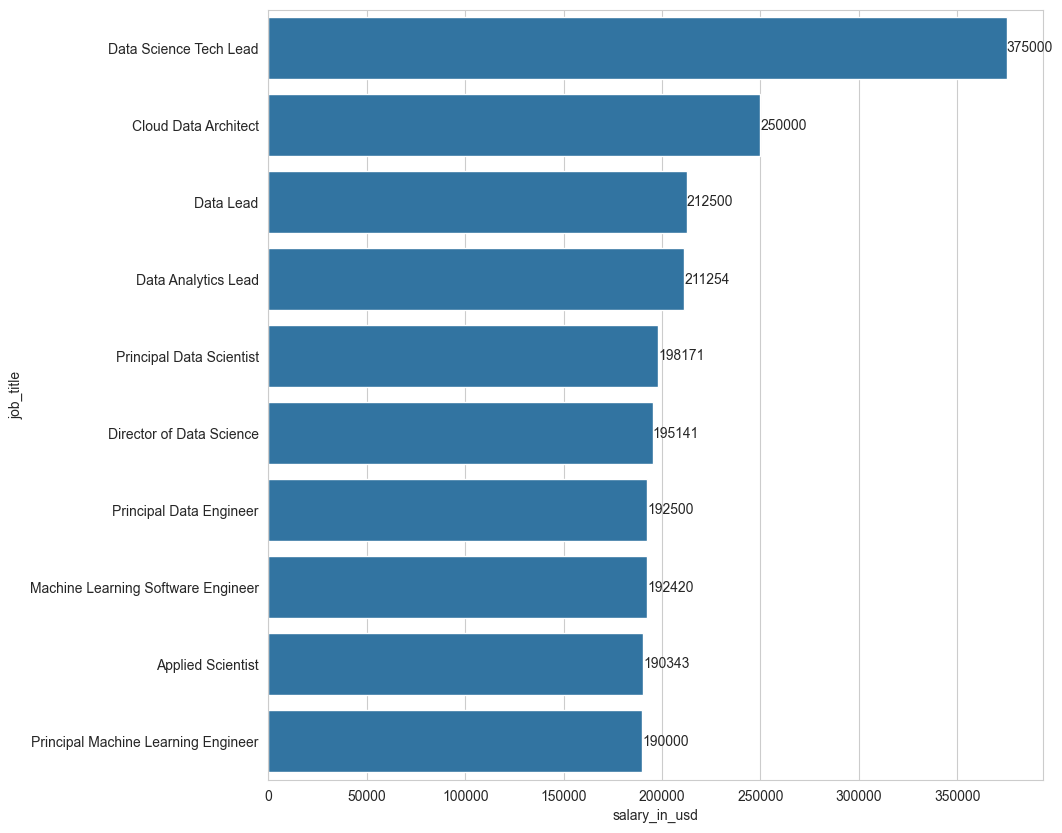

In [16]:
#Какие самые высокооплачиваемые должности? 
# Не понял, нужно среднюю зарплату по должностям или максимальную. Сделал сначала среднюю, потом максимальную.
temp = df.groupby(['job_title'])['salary_in_usd'].agg('mean').sort_values(ascending=False)
temp_top = temp.head(10)
plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp_top, y=temp_top.index, orient='h', order=temp_top.index)
ax.bar_label(ax.containers[0])
plt.show()

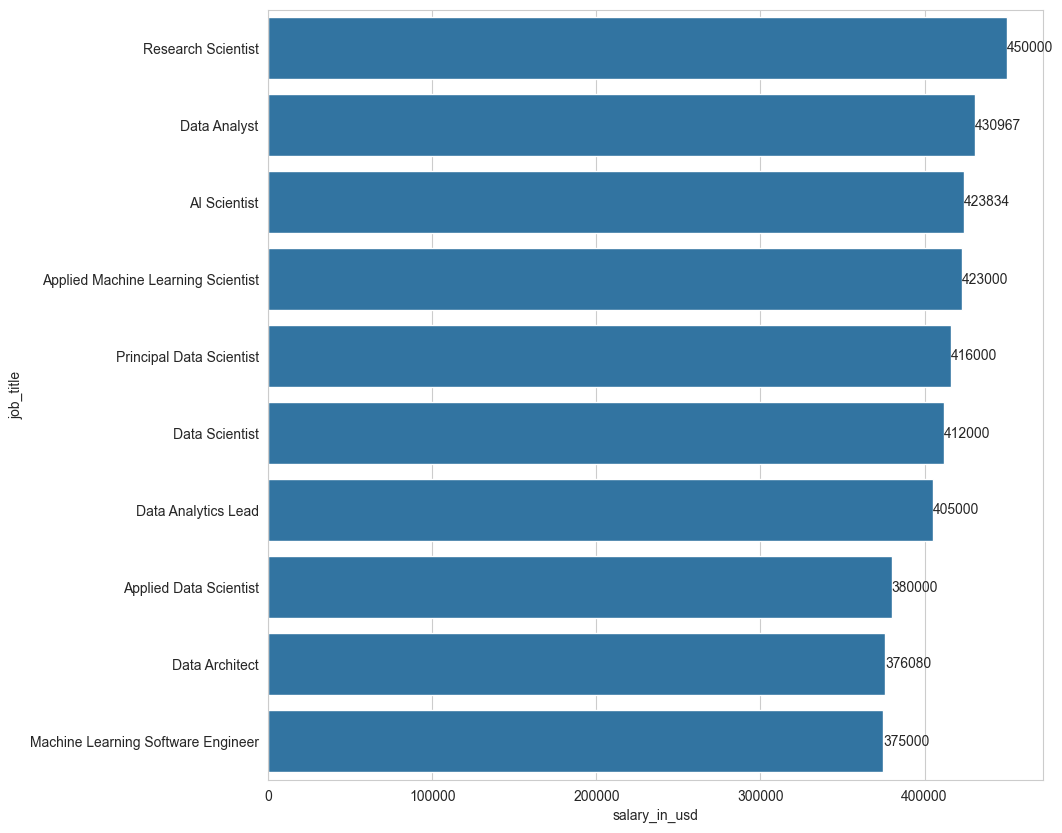

In [17]:
temp = df.groupby(['job_title'])['salary_in_usd'].agg('max').sort_values(ascending=False)
temp_top = temp.head(10)
plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp_top, y=temp_top.index, orient='h', order=temp_top.index)
ax.bar_label(ax.containers[0])
plt.show()

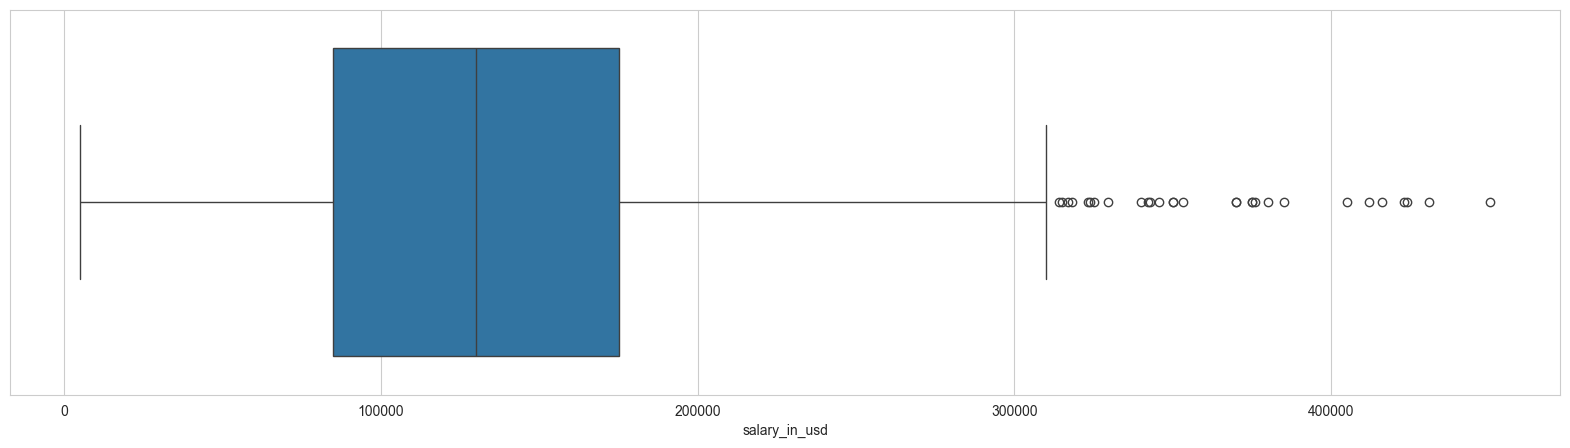

In [18]:
#Есть ли выбросы в заработной плате? по диаграмме размаха делаем вывод, что выбросы при зарплате больше 310000 долларов
plt.figure(figsize=(20,5))
sns.boxplot(df.salary_in_usd, orient='h')
plt.show()

In [19]:
df[df.salary_in_usd > 310000].sort_values('job_title', ascending=True) #Смотрим в каких профессиях случаются выбросы по зарплатам.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3468,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
1421,2023,SE,FT,Applied Scientist,350000,USD,350000,US,0,US,L
33,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M
3463,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
2555,2022,SE,FT,Data Architect,345600,USD,345600,US,0,US,M
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M


In [20]:
big_salary = df[df.salary_in_usd > 310000].sort_values('job_title', ascending=True).job_title.unique()
print(f'За последние три года самые прибыльные платформы - {big_salary}')

За последние три года самые прибыльные платформы - ['AI Scientist' 'Applied Data Scientist'
 'Applied Machine Learning Scientist' 'Applied Scientist'
 'Computer Vision Engineer' 'Data Analyst' 'Data Analytics Lead'
 'Data Architect' 'Data Engineer' 'Data Science Tech Lead'
 'Data Scientist' 'Director of Data Science' 'Head of Data'
 'Head of Data Science' 'Machine Learning Engineer'
 'Machine Learning Software Engineer' 'Principal Data Scientist'
 'Research Scientist']


In [21]:
#Влияет ли удаленная работа на зарплату?
avg_salary = df.salary.mean()
int(avg_salary.round())

210365

In [22]:
avg_salary_remote = df[df.remote_ratio > 0].salary.mean()
int(avg_salary_remote.round())

252950

In [23]:
#Средняя зарплата при работе на удаленке выше средней зарплаты

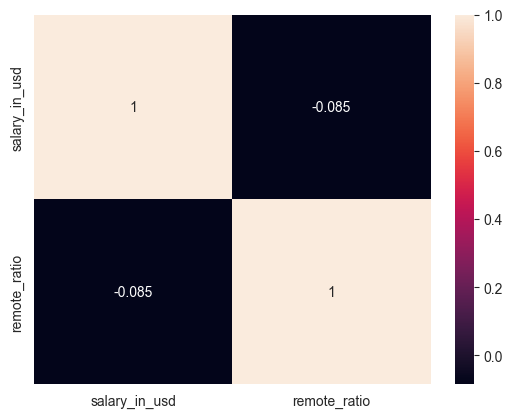

In [24]:
sns.heatmap(df[['salary_in_usd', 'remote_ratio']].corr(), annot=True);

In [25]:
#Зависит ли заработная плата от размера предприятия? находим среднюю зарплату, группируя по размеру предприятия
syze = df.groupby(['company_size'])['salary_in_usd'].agg('mean').sort_index(ascending=False)
syze

company_size
S     78364.278912
M    141474.514300
L    113202.239609
Name: salary_in_usd, dtype: float64

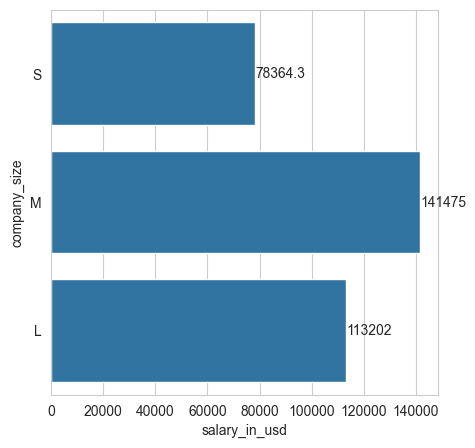

In [26]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=syze, y=syze.index, orient='h', order=syze.index)
ax.bar_label(ax.containers[0])
plt.show()

In [27]:
#Какие страны наиболее популярны среди вакансий?
countries =df.groupby(['company_location'])['salary_in_usd'].agg('count').sort_values(ascending=False)
countries

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MT       1
MD       1
PH       1
SK       1
VN       1
Name: salary_in_usd, Length: 72, dtype: int64

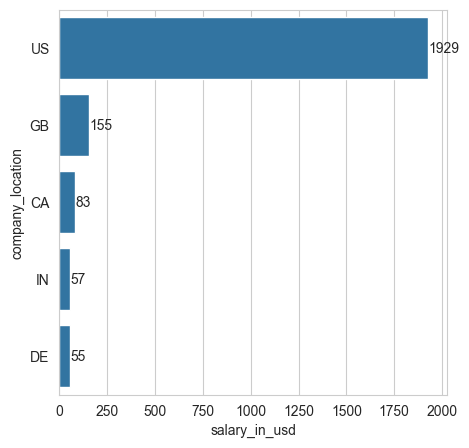

In [28]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=countries.head(), y=countries.head().index, orient='h', order=countries.head().index)
ax.bar_label(ax.containers[0])
plt.show() 
#  US - лидер по вакансиям с огромным отрывом от GB, CA, IN, DE

In [29]:
#В каких заработная плата выше, а в каких ниже?
countries_big_salary =df.groupby(['company_location'])['salary_in_usd'].agg('mean').sort_values(ascending=False)
countries_big_salary

company_location
IL    271446.500000
PR    167500.000000
US    152374.791602
RU    140333.333333
CA    130572.759036
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64

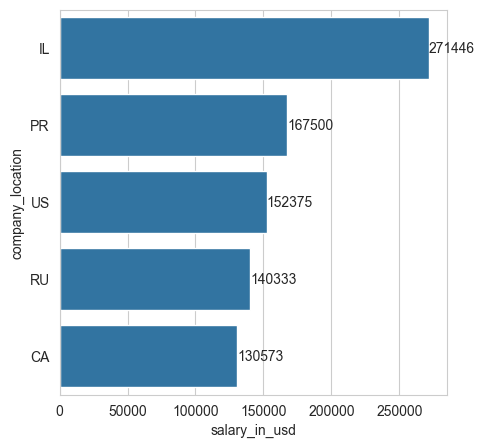

In [30]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=countries_big_salary.head(), y=countries_big_salary.head().index, orient='h', order=countries_big_salary.head().index)
ax.bar_label(ax.containers[0])
plt.show() #страны с максимальными средними зарплатами

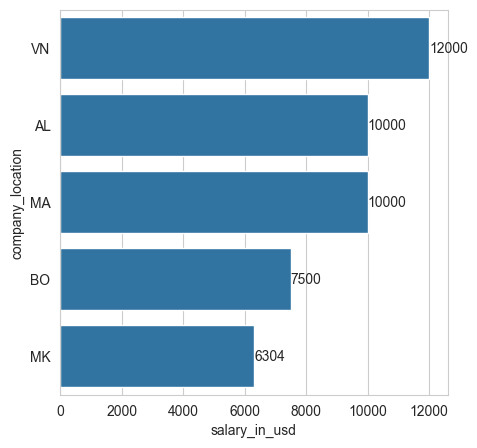

In [31]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=countries_big_salary[-5:], y=countries_big_salary[-5:].index, orient='h', order=countries_big_salary[-5:].index)
ax.bar_label(ax.containers[0])
plt.show() #страны с минимальными средними зарплатами

In [58]:
#Оцените медианную зарплату для каждой должности
median_salary =df.groupby(['job_title'])['salary_in_usd'].agg('median').sort_values(ascending=False)
median_salary

job_title
Data Science Tech Lead           375000.0
Cloud Data Architect             250000.0
Data Lead                        212500.0
Data Analytics Lead              211254.5
Head of Data                     202500.0
                                   ...   
Product Data Analyst              20000.0
3D Computer Vision Researcher     15000.0
Staff Data Analyst                15000.0
Product Data Scientist             8000.0
Power BI Developer                 5409.0
Name: salary_in_usd, Length: 93, dtype: float64

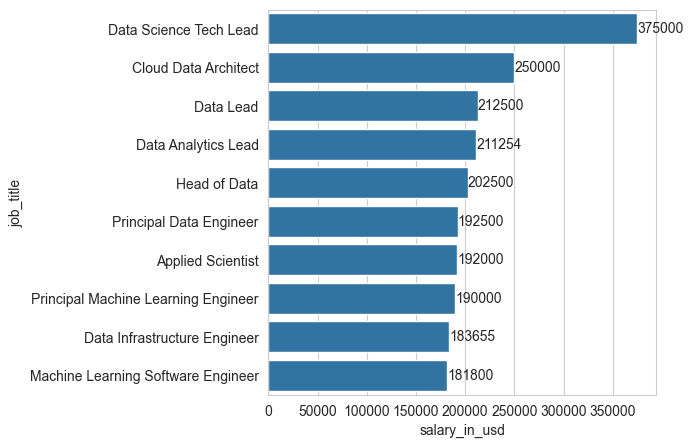

In [60]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=median_salary.head(10), y=median_salary.head(10).index, orient='h', order=median_salary.head(10).index)
ax.bar_label(ax.containers[0])
plt.show()

In [55]:
#Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020
df[df.work_year == 2020 ]['salary_in_usd']. median ()

np.float64(74130.0)

In [56]:
df[df.work_year == 2023 ]['salary_in_usd']. median () #видим что медиана зарплаты выросла практически в 2 раза

np.float64(140000.0)

In [61]:
#Какие должности стали более оплачиваемы, а какие нет?
median_salary_2020 =df[df.work_year == 2020 ].groupby(['job_title'])['salary_in_usd'].agg('median').sort_values(ascending=False)
median_salary_2020

job_title
Director of Data Science                    325000.0
Machine Learning Scientist                  260000.0
Research Scientist                          246000.0
Data Science Manager                        190200.0
Lead Data Scientist                         152500.0
Principal Data Scientist                    148261.0
Machine Learning Engineer                   144000.0
Machine Learning Manager                    117104.0
Big Data Engineer                           109024.0
Business Data Analyst                       100000.0
BI Data Analyst                              98000.0
Lead Data Engineer                           90500.0
Lead Data Analyst                            87000.0
Data Engineer                                72134.5
Data Scientist                               62726.0
Computer Vision Engineer                     60000.0
Data Science Consultant                      54353.5
Machine Learning Infrastructure Engineer     50180.0
AI Scientist                        

In [62]:
median_salary_2023 =df[df.work_year == 2023 ].groupby(['job_title'])['salary_in_usd'].agg('median').sort_values(ascending=False)
median_salary_2023

job_title
Head of Data                     269600.0
Director of Data Science         249300.0
AI Scientist                     231232.5
Data Lead                        212500.0
Computer Vision Engineer         212500.0
                                   ...   
Compliance Data Analyst           30000.0
Business Data Analyst             21461.0
Data Analytics Lead               17509.0
Product Data Analyst              16414.0
Autonomous Vehicle Technician      7000.0
Name: salary_in_usd, Length: 65, dtype: float64

In [71]:
#должности с вырасшей зарплатой
jobs_with_increased_salary = median_salary_2023 - median_salary_2020 
jobs_with_increased_salary.sort_values(ascending=False).head()

job_title
AI Scientist                                185336.5
ML Engineer                                 164034.0
Computer Vision Engineer                    152500.0
Machine Learning Infrastructure Engineer    121420.0
Data Scientist                               87274.0
Name: salary_in_usd, dtype: float64

In [75]:
#должности с упавшей зарплатой
jobs_with_dropped_salary = median_salary_2020 - median_salary_2023
jobs_with_dropped_salary.sort_values(ascending=False).head()

job_title
Research Scientist            95100.0
Business Data Analyst         78539.0
Director of Data Science      75700.0
Principal Data Scientist      62414.0
Machine Learning Scientist    50000.0
Name: salary_in_usd, dtype: float64

In [95]:
#Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа
the_richest_worker =df.groupby(['salary_in_usd']).max().sort_index(ascending=False).head(10)
the_richest_worker[['job_title', 'employee_residence', 'remote_ratio']]

,job_title,employee_residence,remote_ratio
salary_in_usd,,,
450000,Research Scientist,US,0
430967,Data Analyst,GB,0
423834,AI Scientist,IL,0
423000,Applied Machine Learning Scientist,US,50
416000,Principal Data Scientist,US,100
412000,Data Scientist,US,100
405000,Data Analytics Lead,US,100
385000,Data Analyst,US,0
380000,Applied Data Scientist,US,100


In [115]:
#Много ли людей работают и проживают в разных регионах?
dif_regions = df.count().unique() - df[df.employee_residence == df.company_location].count().unique()
print(*dif_regions, 'человек')

96 человек


In [121]:
#Где больше всего людей проживает?
the_most_lives_in =df.groupby(['employee_residence'])['salary_in_usd'].agg('count').sort_values(ascending=False)
the_most_lives_in.head()


employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
Name: salary_in_usd, dtype: int64

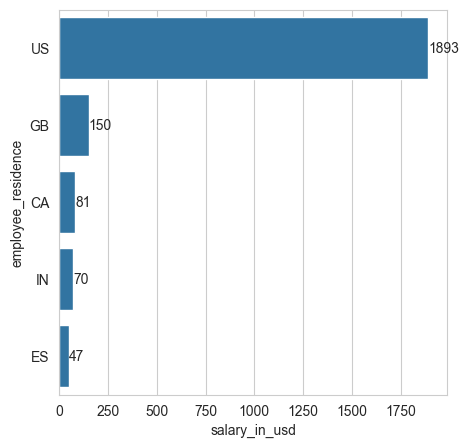

In [122]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=the_most_lives_in.head(), y=the_most_lives_in.head().index, orient='h', order=the_most_lives_in.head().index)
ax.bar_label(ax.containers[0])
plt.show() #подавляющее большинство людей проживает в US

In [150]:
#много ли из них (в процентном соотношении) работают удаленно на другую страну?
wokers_from_US = df[df.employee_residence == 'US']
wokers_from_US_for_other_country = int(wokers_from_US[wokers_from_US.company_location != 'US'].count().unique())/int(wokers_from_US.count().unique())*100
print(f'{wokers_from_US_for_other_country} % живут в US и работают удаленно на другую страну')


0.26413100898045433 % живут в US и работают удаленно на другую страну
